# Economic time series and releases: revisions and vintages

- St Louis Fed FRED/ALFRED

Author: Terence Lim

In [1]:
    import numpy as np
    import pandas as pd
    from pandas import DataFrame, Series
    import matplotlib.pyplot as plt
    import time
    from datetime import datetime
    import os
    from finds.alfred import Alfred, fred_md
    from settings import settings
    ECHO = False
    imgdir = os.path.join(settings['images'], 'ts')
    alf = Alfred(api_key=settings['fred']['api_key'], echo=ECHO)

## Popular FRED series web pages

In [2]:
    r = {}
    for page in [1, 2]:  # scrapte the first two web pages
        popular = Alfred.popular(page)
        for s in popular:
            t = alf.series(s)   # calls 'series' FRED api
            r.update({s: {} if t.empty else t.iloc[-1][['title', 'popularity']]})
    DataFrame.from_dict(r, orient='index')

,title,popularity
T10Y2Y,10-Year Treasury Constant Maturity Minus 2-Yea...,100
DGS10,10-Year Treasury Constant Maturity Rate,100
T10YIE,10-Year Breakeven Inflation Rate,99
UNRATE,Unemployment Rate,99
M2,M2 Money Stock (DISCONTINUED),99
GDPC1,Real Gross Domestic Product,96
BAMLH0A0HYM2,ICE BofA US High Yield Index Option-Adjusted S...,98
CPIAUCSL,Consumer Price Index for All Urban Consumers: ...,98
FEDFUNDS,Effective Federal Funds Rate,96
M1,M1 Money Stock (DISCONTINUED),97


## FRED category tree: DFS traverse to first leaf node

In [3]:
    node = 0
    while True:
        node = alf.get_category(node)
        print(f"[{node['id']}]", node['name'],
              f"(#children={len(node['children'])})",
              f"(#series={len(node['series'])})")
        if not (node['children']):
            break
        node = np.min([child['id'] for child in node['children']])
        # node = np.random.choice(node['children'])['id']
    for i, row in enumerate(node['series']):
        print(i, row['id'], row['title'])

[0] Categories (#children=8) (#series=0)
[1] Production & Business Activity (#children=15) (#series=3274)
[3] Industrial Production & Capacity Utilization (#children=1) (#series=1884)
[33938] Automotive Production Seasonal Factor (#children=0) (#series=7)
0 G17MVSFAUTOS Regular Seasonal Factors: Auto Production
1 G17MVSFLTRUCKS Regular Seasonal Factors: Light Truck Production
2 G17MVSFTTRUCKS Regular Seasonal Factors: Total Truck Production
3 G17MVSFWAUTOS Weekday-Basis Seasonal Factors: Auto Production
4 G17MVSFWLTRUCKS Weekday-Basis Seasonal Factors: Light Truck Production
5 G17MVSFWTTRUCKS Weekday-Basis Seasonal Factors: Total Truck Production
6 G17MVSFWWKDAYS Weekday-Basis Seasonal Factors: Weekdays for Calculation


## Revisions of macroeconomic releases:  latest, vintage, revision number, months lag

In [3]:
    s = 'INDPRO'  # Industrial Production
    print(f"Latest revision (as of {datetime.today().strftime('%Y-%m-%d')}:")
    print(alf(s, start=20200401, end=20200731, realtime=True))

Latest revision (as of 2021-03-09:
            INDPRO  realtime_start  realtime_end
date                                            
20200430   91.2658        20201016      99991231
20200531   92.0613        20201117      99991231
20200630   97.8019        20201215      99991231
20200731  101.9086        20210115      99991231


In [4]:
    print("First Release:")
    print(alf(s, release=1, start=20200401, end=20200731, realtime=True))

First Release:
            INDPRO  realtime_start  realtime_end
date                                            
20200430   92.5919        20200515      20200615
20200531   92.5503        20200616      20200714
20200630   97.4587        20200715      20200813
20200731  100.1665        20200814      20200914


In [5]:
    print("Second Release:")
    print(alf(s, release=2, start=20200401, end=20200731, realtime=True))

Second Release:
            INDPRO  realtime_start  realtime_end
date                                            
20200430   91.2823        20200616      20200714
20200531   92.4534        20200715      20200813
20200630   97.2225        20200814      20200914
20200731  100.9921        20200915      20201015


In [6]:
    print("Five-Monthly Lag:")
    print(alf(s, release=pd.DateOffset(months=5), start=20200401, end=20200731,
              realtime=True))

Five-Monthly Lag:
            INDPRO  realtime_start  realtime_end
date                                            
20200430   91.0080        20200915      20201015
20200531   91.9327        20201016      20201116
20200630   97.6032        20201117      20201214
20200731  101.8924        20201215      20210114


In [7]:
    print("Vintage date = 20200630:")
    print(alf(s, vintage=20200630, realtime=True, start=20200401))

Vintage date = 20200630:
           INDPRO  realtime_start  realtime_end
date                                           
20200430  91.2823        20200616      20200714
20200531  92.5503        20200616      20200714


## INDPRO revisions history by months lagged

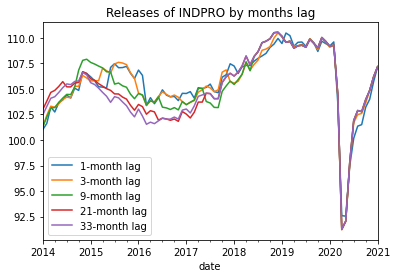

In [8]:
    df = pd.concat([alf(s, start=20140101, release=pd.DateOffset(months=m))\
                    .rename(f"{m}-month lag") for m in [1,3,9,21,33]], axis=1)
    df.index = pd.DatetimeIndex(df.index.astype(str))
    ax = df.plot(logy=False)
    ax.set_title(f"Releases of {s} by months lag")
    plt.savefig(os.path.join(imgdir, 'release_months.jpg'))

## INDPRO revisions history by revision number

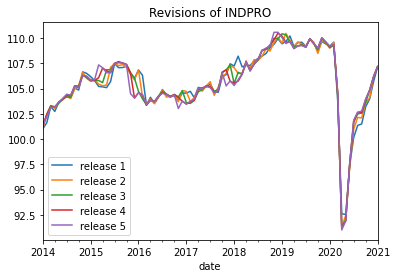

In [9]:
    df = pd.concat([alf(s, start=20140101, release=n).rename(f"release {n}")
                   for n in range(1, 6)], axis=1)
    df.index = pd.DatetimeIndex(df.index.astype(str))

    ax = df.plot(logy=False)
    ax.set_title(f"Revisions of {s}")
    plt.savefig(os.path.join(imgdir, 'release_revisions.jpg'))


## Release dates of series in FRED-MD collection

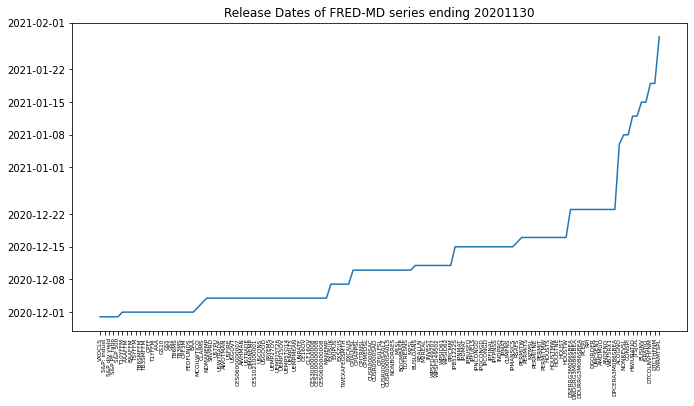

,0
"(ACOGNO, Manufacturers' New Orders: Consumer Goods)",20210106
"(NONREVSL, Total Nonrevolving Credit Owned and Securitized, Outstanding)",20210108
"(CONSPI, Nonrevolving consumer credit to Personal Income)",20210108
"(HWIURATIO, Ratio of Help Wanted/No. Unemployed)",20210112
"(JTSJOL, Job Openings: Total Nonfarm)",20210112
"(BUSINV, Total Business Inventories)",20210115
"(ISRATIO, Total Business: Inventories to Sales Ratio)",20210115
"(DTCOLNVHFNM, Consumer Motor Vehicle Loans Owned by Finance Companies, Outstanding)",20210119
"(DTCTHFNM, Total Consumer Loans and Leases Owned and Securitized by Finance Companies, Outstanding)",20210119
"(CMRMTSPL, Real Manufacturing and Trade Industries Sales)",20210129


In [2]:
mdf, mt = fred_md()
end = mdf.index[-3]
out = {}
for i, col in enumerate(mdf.columns):
    out[col] = alf(col, release=1, start=end, end=end, realtime=True)
    if col.startswith('S&P'):   # stock market data available same day close
        out[col] = Series({end: end}, name='realtime_start').to_frame()
    elif col in alf.fred_adjust:
        if isinstance(alf.fred_adjust[col], str):
            out[alf.fred_adjust[col]] = alf(alf.fred_adjust[col], release=1, 
                                            start=end, end=end, realtime=True)
        else:  # if FRED-MD series was spliced
            out[col] = pd.concat([alf(c, release=1, start=end, end=end,
                                      realtime=True)
                                  for c in alf.fred_adjust[col][1:]])

# special cases of Claims (averages weekly) and Cons Sentiment (date convention)
out['UMCSENT'] = alf('UMCSENT', release=1, realtime=True)
out['UMCSENT'] = out['UMCSENT'][out['UMCSENT']['realtime_start'] > end].iloc[:1]
out['CLAIMS'] = alf('ICNSA', release=1, realtime=True)
out['CLAIMS'] = out['CLAIMS'][out['CLAIMS']['realtime_start'] > end].iloc[:1]

# Plot for a representative monthly cross-section
release = Series({k: max(v['realtime_start']) for k,v in out.items()
                  if v is not None and len(v)}).sort_values()
fig, ax = plt.subplots(clear=True, num=1, figsize=(10,6))
ax.plot(pd.DatetimeIndex(release.astype(str)))
ax.set_title(f"Release Dates of FRED-MD series ending {end}")
ax.set_xticks(np.arange(len(release)))
ax.set_xticklabels(release.index, rotation=90, fontsize='xx-small')
plt.tight_layout(pad=2)
if imgdir: plt.savefig(os.path.join(imgdir, 'fredmd_release.jpg'))
plt.show()

Series(release.values, index=[(s, alf.header(s)) for s in release.index]).to_frame().tail(10)